In [38]:
import pandas as pd
import numpy as np
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [10]:
cd E:/BE/Sem-8/Project1/

E:\BE\Sem-8\Project1


In [11]:
pwd

'E:\\BE\\Sem-8\\Project1'

In [12]:
TRAIN_DIR = 'E:/BE/Sem-8/Project1/images/train/'
TEST_DIR = 'E:/BE/Sem-8/Project1/images/validation/'

In [13]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [14]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

Angry Completed
Disgust Completed
Fear Completed
Happy Completed
Neutral Completed
Sad Completed
Surprise Completed


,image,label
0,E:/BE/Sem-8/Project1/images/train/Fear\2720.jpg,Fear
1,E:/BE/Sem-8/Project1/images/train/Neutral\2106...,Neutral
2,E:/BE/Sem-8/Project1/images/train/Angry\2264.jpg,Angry
3,E:/BE/Sem-8/Project1/images/train/Sad\33905.jpg,Sad
4,E:/BE/Sem-8/Project1/images/train/Fear\4990.jpg,Fear


In [15]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

Angry Completed
Disgust Completed
Fear Completed
Happy Completed
Neutral Completed
Sad Completed
Surprise Completed


,image,label
0,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry
1,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry
2,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry
3,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry
4,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry


In [17]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [18]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [19]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [20]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [21]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [22]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [23]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [33]:
pwd

'E:\\BE\\Sem-8\\Project1'

In [35]:
from tensorflow import keras

In [36]:
model = keras.models.load_model('facial_emotional_model.h5py')

Predicted Output: Surprise


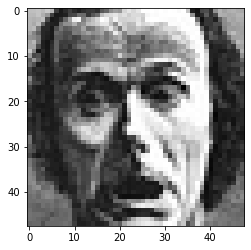

In [39]:
image_index = random.randint(0, len(test))
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Predicted Output: Neutral


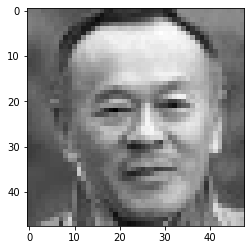

In [43]:
image_index = random.randint(0, len(test))
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Happy
Predicted Output: Happy


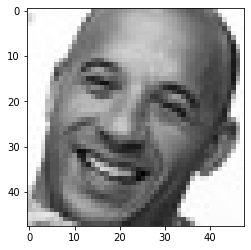

In [48]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48,48), cmap='gray');

Original Output: Fear
Predicted Output: Fear


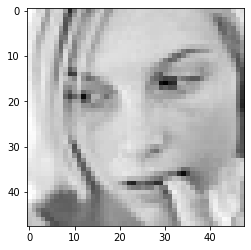

In [43]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Happy
Predicted Output: Happy


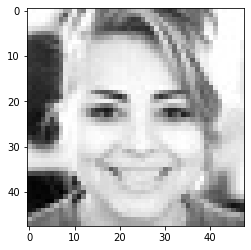

In [44]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Happy
Predicted Output: Happy


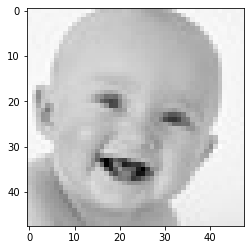

In [49]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Sad
Predicted Output: Sad


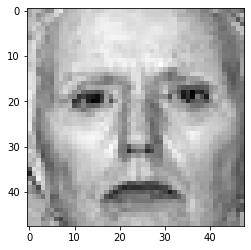

In [50]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Happy
Predicted Output: Happy


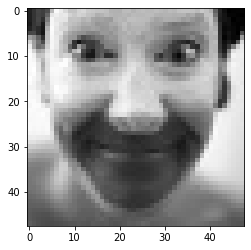

In [51]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Neutral
Predicted Output: Sad


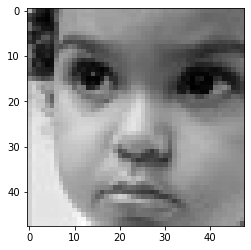

In [55]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Happy
Predicted Output: Happy


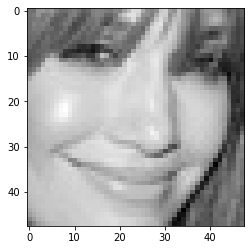

In [59]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Surprise
Predicted Output: Fear


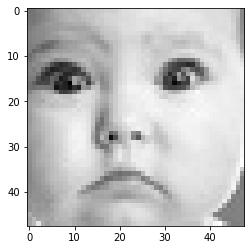

In [57]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');